In [6]:
library(ggseqlogo)
library(ggplot2)
library(patchwork)

In [7]:
read_nptxt_matrix <- function(fname) {
    d=read.table(fname)
    colnames(d) = c("A", "C", "G", "T")
    t(d)
}

In [8]:
revcomp <- function(x) {
    x = x[rev(seq(nrow(x))), rev(seq(ncol(x)))]
    rownames(x) = c("A", "C", "G", "T")
    x
}

In [9]:
trim_and_plot <- function(m, rc=F, trim_left=0, trim_right=0, method='bits', ymin=0, ymax=2, title=NULL) {

    m = m[, trim_left:(ncol(m)-trim_right)]

    print(dim(m))
    
    if (rc) {
        m = revcomp(m)                
    }



    rownames(m) = c("A","C","G","T")
    
    f="helvetica_regular"
    p <- ggseqlogo(m, method=method, font=f, ncol=1, size=12) + 
                                    ylim(c(ymin,ymax)) 
    
    if (!is.null(title)) {
        p = p 
        p = p + ggtitle(title)
        p = p + theme(plot.title = element_text(hjust = 0.5, size=20, vjust=-28)) +
            theme(axis.ticks.x = element_blank(),
               axis.text.x = element_blank()) +
                # axis.ticks.y = element_blank(),
              # axis.text.y = element_blank()) + 
            scale_y_continuous(limits=c(0,ymax), breaks=c(0,ymax))

    }
    
    p
}

In [15]:
get_plots <- function(subcluster_base_path, input_ls, annotations, rc=F, trim_left=0, trim_right=0, first_yaxis=F, ymax=.01) {
    transient_plots = list()
    num_instances_per_motif = 5
    i = 1
    
    for (x in input_ls) {

        #print(sprintf(subcluster_base_path, x))
        submotif = read_nptxt_matrix(paste(subcluster_base_path, x, sep=""))
        print(submotif)
        print(max(submotif))
        rc=FALSE
        if(grepl( "neg", x, fixed = TRUE)){
            rc=TRUE }

        trim_left_n=trim_left
        trim_right_n=trim_right
        ymax=ymax
        if(grepl( "model", x, fixed = TRUE)){
            ymax=2.1
            trim_left_n=0
            trim_right_n=0}
            

        textn = annotations[annotations["key"]==x][2]
        transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left_n, trim_right_n, method='custom',
                                         ymin=9, ymax=ymax, title=textn)

        #transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right)

        transient_plots[[i]] = transient_plots[[i]] 
                                    #annotate('text', 
                                    #         x=ncol(submotif), 
                                    #         y=max(submotif), 
                                    #         size=5,
                                    #         label=sprintf("%.2f",as.numeric(textn))
                                    #         )
        transient_plots[[i]]


        i = i +1
        }
        
        
    transient_plots

}

           [,1]         [,2]          [,3]          [,4]         [,5]
A -1.243635e-04 6.363122e-06 -1.107721e-04 -3.713075e-05 1.146301e-04
C -9.789997e-05 4.963962e-06 -8.692142e-05 -2.895622e-05 8.863938e-05
G -9.847763e-05 5.019125e-06 -8.777392e-05 -2.935028e-05 9.011899e-05
T -1.261718e-04 6.441550e-06 -1.122256e-04 -3.752255e-05 1.156359e-04
          [,6]          [,7]          [,8]         [,9]         [,10]
A 2.533925e-05 -3.565936e-05 -6.893764e-05 1.832613e-05 -2.434222e-05
C 1.966477e-05 -2.776391e-05 -5.397924e-05 1.426073e-05 -1.896820e-05
G 2.010256e-05 -2.843050e-05 -5.465434e-05 1.441635e-05 -1.914465e-05
T 2.568831e-05 -3.625536e-05 -6.995717e-05 1.847751e-05 -2.448989e-05
         [,11]         [,12]        [,13]         [,14]        [,15]
A 5.074678e-05 -2.955242e-05 1.460276e-06 -5.196148e-09 7.234578e-05
C 3.950560e-05 -2.310937e-05 1.136221e-06 -4.019914e-09 5.631807e-05
G 3.984592e-05 -2.333498e-05 1.153512e-06 -4.091161e-09 5.674598e-05
T 5.122599e-05 -2.993246

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



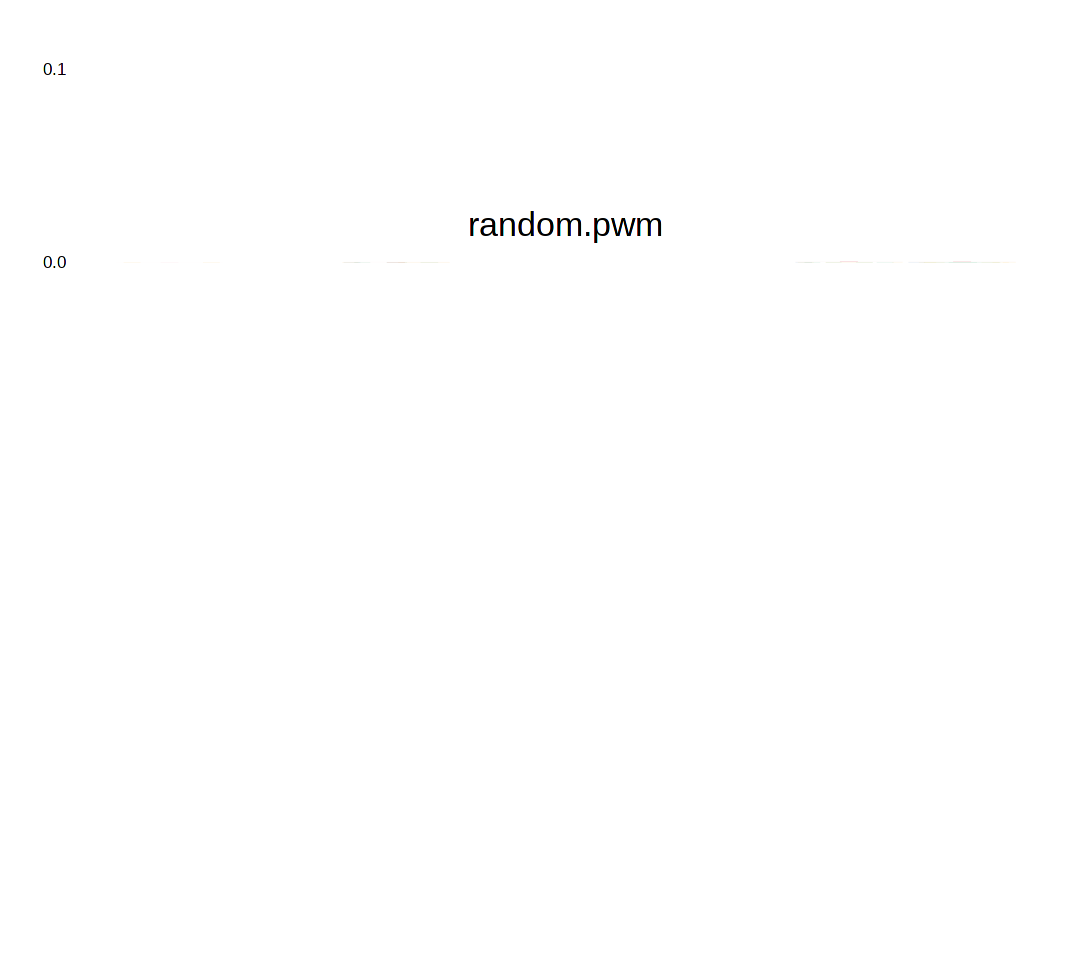

In [22]:

options(repr.plot.width = 9, repr.plot.height = 8)

#input_files=c("dnase_no_shift .pwm", "dnase_no_shift_pos.pwm", "dnase_no_shift_neg.pwm", "dnase_01_shift.pwm", "dnase_01_shift_pos.pwm", "dnase_01_shift_neg.pwm")
#input_files=c("dnase_no_shift_pos.pwm", "dnase_01_shift_pos.pwm", "dnase_no_shift_neg.pwm", "dnase_01_shift_neg.pwm", "dnase_no_shift.pwm", "dnase_01_shift.pwm", "no_shift_model_cnn.pwm", "01_shift_model_cnn.pwm")
input_files=c("random.pwm")

labels=c("PWM on + strand", "PWM on + strand", "PWM on - strand", "PWM on - strand", "PWM on unstranded", "PWM on unstranded", "weights learnt by CNN model", "weights learnt by CNN model")
#labels=c("PWM on + strand", "PWM on + strand", "PWM on - strand", "PWM on - strand", "PWM on unstranded", "PWM on unstranded", "weights learnt by CNN model", "weights learnt by CNN model")

annotations= data.frame("key" = input_files, "label" = labels, stringsAsFactors = FALSE)

all_plots = get_plots("", input_files, annotations,
                       rc=F, trim_left=9, trim_right=8, first_yaxis = F, ymax=0.10
                     )

#do.call(gridExtra::grid.arrange, c(all_plots, ncol=1))

p1 = wrap_plots(all_plots[c(1)], nrow=4)
#p2 = wrap_plots(all_plots[c(2,4,6,8)], nrow=4)

p1
ggsave("random.pdf", device = "pdf",  width = 9, height = 8, dpi = 300)



[1]  4 23


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



[1]  4 23


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



[1]  4 23


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



[1]  4 23


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



[1]  4 23


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



[1]  4 23


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



[1]  4 24


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



[1]  4 24


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



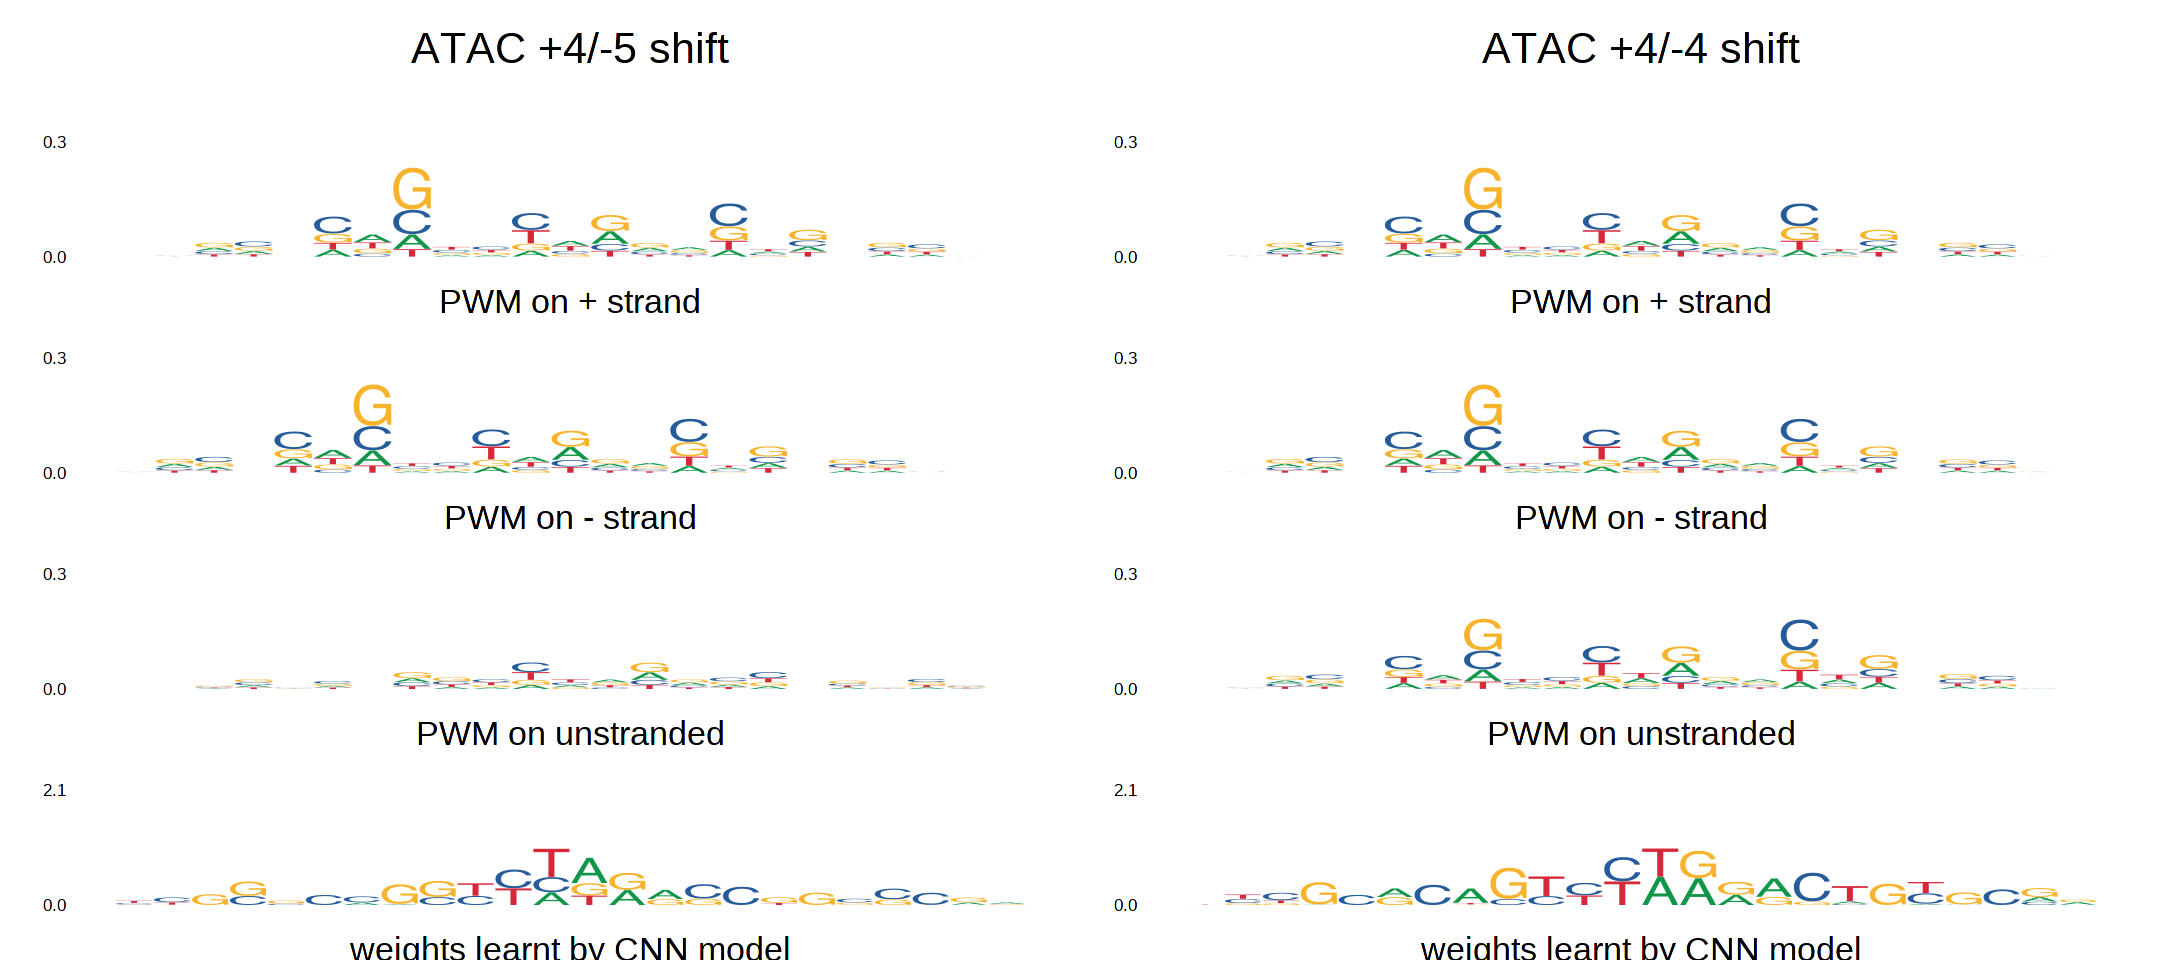

In [10]:

options(repr.plot.width = 18, repr.plot.height = 8)

#input_files=c("dnase_no_shift .pwm", "dnase_no_shift_pos.pwm", "dnase_no_shift_neg.pwm", "dnase_01_shift.pwm", "dnase_01_shift_pos.pwm", "dnase_01_shift_neg.pwm")
input_files=c("atac_45_shift_pos.pwm", "atac_44_shift_pos.pwm", "atac_45_shift_neg.pwm", "atac_44_shift_neg.pwm", "atac_45_shift.pwm", "atac_44_shift.pwm", "45_shift_model_cnn.pwm", "44_shift_model_cnn.pwm")

labels=c("PWM on + strand", "PWM on + strand", "PWM on - strand", "PWM on - strand", "PWM on unstranded", "PWM on unstranded", "weights learnt by CNN model", "weights learnt by CNN model")
#labels=c("PWM on + strand", "PWM on + strand", "PWM on - strand", "PWM on - strand", "PWM on unstranded", "PWM on unstranded")

annotations= data.frame("key" = input_files, "label" = labels, stringsAsFactors = FALSE)

all_plots = get_plots("", input_files, annotations,
                       rc=F, trim_left=2, trim_right=0, first_yaxis = F, ymax=0.3)

#do.call(gridExtra::grid.arrange, c(all_plots, ncol=1))

p1 = wrap_plots(all_plots[c(1,3,5,7)], nrow=4)
p2 = wrap_plots(all_plots[c(2,4,6,8)], nrow=4)

TXTSZ=9
top_plot_right = ggplot() + annotate("text", x=0, y=0, label="ATAC +4/-5 shift", size=TXTSZ) +
            theme_void()

g1 = wrap_plots(top_plot_right, p1, ncol=1, widths=c(10,10), heights=c(1,10))


top_plot_left = ggplot() + annotate("text", x=0, y=0, label="ATAC +4/-4 shift", size=TXTSZ) +
            theme_void()

g2 = wrap_plots(top_plot_left, p2, ncol=1, widths=c(10,10), heights=c(1,10))

wrap_plots(g1, g2, nrow=1)

ggsave("tn5_compare_shift.pdf", device = "pdf",  width = 18, height = 8, dpi = 300)

